# AIDM 7350 group project

Group info:

**Code part:**

YANG Xuzhen(21457263)section 2

HU Xuanyu(21462933) section 2

SUN Shuaishuai(21452466) section 2

**Literature review:**

LIANG Tong(21426775) section 2

FANG Xinyu(21462941) section 2

| Name | Tasks | 
|-- | -- |
| YANG Xuzhen | Data precessing, RQ1 RQ8 RQ9 RQ10|
| HU Xuanyu   |Data preprocessing, RQ2 RQ3 RQ5 |
| SUN Shuaishuai  | RQ4 RQ6 RQ7 |

## research questions:

1. what attributes distribution in people suffering fatal killings? like race/gender/age…

2. What distributed pattern of the number of fatal shooting cases with the poverty rate and education level grouped by state?

3. What is this killing tendency pattern of fatal shooting in the US by a police officer in the line of duty over time? Did such tragedies issues happen frequently?

4. what armed-level disttribution in these fatal killing distribution?

5. Are there any characteristics of the distribution of shootings in various states in the United States?  Which state has the most shootings in the US (most dangerous state)

6. Is that glee behavior are more likely to trigger polices using terser?

7. Is there a declare trend of the number of police shooting cases after widely social discussion and reporting?

8. What are the characteristics of the states and territories with high shooting rates in terms of income, education level, racial distribution, poverty level, etc.?

9. Based on this dataset,can we predict whether a victim has signs of mental illness?

10.Can we predict the likely race of the victim based on the remaining variables?

-------------------------code field------------------------------------

In [1]:
import pandas as pd

# Data preprocess

In [2]:
#read files as pd
killingsData = pd.read_csv('../data/PoliceKillingsUS.csv')

### 1.pre-process poverty data

In [3]:
povertyData = pd.read_csv('../data/PercentagePeopleBelowPovertyLevel.csv')

In [4]:
#fill nan value with 0
for index,value in povertyData.iterrows():
#     suffix =value[].split(' ')[-1]
    value[2] = value[2].replace('-','0')
    
#convert poverty_rate type into float
povertyData['poverty_rate'] = pd.to_numeric(povertyData['poverty_rate'])

#compute poverty mean value sorted by state
state_poverty = povertyData.groupby('Geographic Area')['poverty_rate'].mean()

state_poverty = state_poverty.to_frame()
state_poverty= state_poverty.reset_index()
state_poverty= state_poverty.rename(columns={'Geographic Area': 'state'})

#merge two dataframe
df_kill_poverty = pd.merge(killingsData,state_poverty, on ='state', how='left')

### 2.pre-process highsch Data

In [5]:
highschData = pd.read_csv('../data/PercentOver25CompletedHighSchool.csv')

In [6]:
#fill nan value with 0
for index,value in highschData.iterrows():
#     suffix =value[].split(' ')[-1]
    value[2] = value[2].replace('-','0')
    
#convert poverty_rate type into float
highschData['percent_completed_hs'] = pd.to_numeric(highschData['percent_completed_hs'])

#compute poverty mean value sorted by state
state_edu = highschData.groupby('Geographic Area')['percent_completed_hs'].mean()

state_edu = state_edu.to_frame()
state_edu= state_edu.reset_index()
state_edu= state_edu.rename(columns={'Geographic Area': 'state'})

#merge file
df_kill_poverty_edu = pd.merge(df_kill_poverty,state_edu, on ='state', how='left')

## 3.pre-process householdincoming data

In [7]:
householdincoming = pd.read_csv('../data/MedianHouseholdIncome2015.csv')

In [8]:
#fill nan value
householdincoming['Median Income'].fillna('0',inplace=True)

for index,value in householdincoming.iterrows():
    #replace unrelated character with o
    value[2] = value[2].replace('-','0')
    value[2] = value[2].replace('(X)','0')
    if value[2]=='2,5000':
        value[2]='25000'
    elif value[2]=='250,000+':
        value[2]='250000'

householdincoming['Median Income'] = pd.to_numeric(householdincoming['Median Income'])

state_incoming = householdincoming.groupby('Geographic Area')['Median Income'].mean()

state_incoming = state_incoming.to_frame()
state_incoming = state_incoming.reset_index()
state_incoming = state_incoming.rename(columns={'Geographic Area': 'state'})

df_kill_poverty_edu_inco = pd.merge(df_kill_poverty_edu,state_incoming, on ='state', how='left')

## 4.pre-process share race data

In [9]:
shareraceData = pd.read_csv('../data/ShareRaceByCity.csv')

In [10]:
for index,value in shareraceData.iterrows():
    #replace unrelated character with o
#     value[2] = value[2].replace('-','0')
    value[2] = value[2].replace('(X)','0')
    value[2]=float(value[2])
    
    value[3] = value[3].replace('(X)','0')
    value[3]=float(value[3])
    
    value[4] = value[4].replace('(X)','0')
    value[4]=float(value[4])
    
    value[5] = value[5].replace('(X)','0')
    value[5]=float(value[5])
    
    value[6] = value[6].replace('(X)','0')
    value[6]=float(value[6])
#convert into float
convert_dict = {'share_white': float,
                'share_black': float,
                'share_native_american':float,
                'share_asian':float,
                'share_hispanic':float
                }
shareraceData = shareraceData.astype(convert_dict)

#compute mean value
state_share_white = shareraceData.groupby('Geographic area')['share_white'].mean()
state_share_white = state_share_white.to_frame()

state_share_black = shareraceData.groupby('Geographic area')['share_black'].mean()
state_share_black = state_share_black.to_frame()

state_share_native_american  = shareraceData.groupby('Geographic area')['share_native_american'].mean()
state_share_native_american  = state_share_native_american.to_frame()

state_share_asian  = shareraceData.groupby('Geographic area')['share_asian'].mean()
state_share_asian  = state_share_asian.to_frame()

state_share_hispanic  = shareraceData.groupby('Geographic area')['share_hispanic'].mean()
state_share_hispanic  = state_share_hispanic.to_frame()

#stored in dataframe
df_race = pd.merge(pd.merge(pd.merge(pd.merge(state_share_asian,state_share_black,left_index=True, right_index=True),
                                     state_share_hispanic,left_index=True, right_index=True),
                            state_share_native_american,left_index=True, right_index=True),
                   state_share_white,left_index=True, right_index=True)
#cancel index
df_race=df_race.reset_index()
df_race= df_race.rename(columns={'Geographic area': 'state'})

df_kill_poverty_edu_inco_race = pd.merge(df_kill_poverty_edu_inco,df_race, on ='state', how='left')

In [11]:
df_kill_poverty_edu_inco_race.to_csv('../data/finalkillingdata.csv')

## 5.Fill nan value

In [12]:
onesheetkill = pd.read_csv('../data/finalkillingdata.csv')

In [13]:
onesheetkill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2535 non-null   int64  
 1   id                       2535 non-null   int64  
 2   name                     2535 non-null   object 
 3   date                     2535 non-null   object 
 4   manner_of_death          2535 non-null   object 
 5   armed                    2526 non-null   object 
 6   age                      2458 non-null   float64
 7   gender                   2535 non-null   object 
 8   race                     2340 non-null   object 
 9   city                     2535 non-null   object 
 10  state                    2535 non-null   object 
 11  signs_of_mental_illness  2535 non-null   bool   
 12  threat_level             2535 non-null   object 
 13  flee                     2470 non-null   object 
 14  body_camera             

In [14]:
#fill missing value in 'armed' column with mode
armed_mode = onesheetkill['armed'].dropna().mode()[0]
armed_mode
#fill nan value
onesheetkill['armed'].fillna(armed_mode,inplace=True)

#fill missing value in 'age' column with mean
onesheetkill['age'].fillna(onesheetkill['age'].dropna().mean(),inplace=True)

#fillmissing value in 'race' column with mode
race_mode = onesheetkill['race'].dropna().mode()[0]
print(race_mode)
onesheetkill['race'].fillna(race_mode,inplace=True)

#fillmissing value in 'flee' column with mode
flee_mode = onesheetkill['flee'].dropna().mode()[0]
onesheetkill['flee'].fillna(flee_mode,inplace=True)

#check information
onesheetkill.info()

W
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2535 non-null   int64  
 1   id                       2535 non-null   int64  
 2   name                     2535 non-null   object 
 3   date                     2535 non-null   object 
 4   manner_of_death          2535 non-null   object 
 5   armed                    2535 non-null   object 
 6   age                      2535 non-null   float64
 7   gender                   2535 non-null   object 
 8   race                     2535 non-null   object 
 9   city                     2535 non-null   object 
 10  state                    2535 non-null   object 
 11  signs_of_mental_illness  2535 non-null   bool   
 12  threat_level             2535 non-null   object 
 13  flee                     2535 non-null   object 
 14  body_camera           

## Answer to question

1. what kind of people are more likely to be shooted? like race/gender/age…

In [15]:
import seaborn as sn

In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [17]:
onesheetkill['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

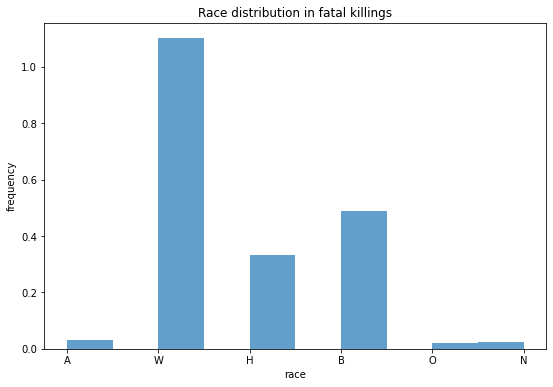

In [18]:
plt.figure(figsize=(9,6))
plt.hist(onesheetkill['race'],density = 1,  
                            alpha = 0.7)
plt.title("Race distribution in fatal killings")
plt.xlabel('race') 
plt.ylabel('frequency') 
# plt.legend(labels=["A","W","H","B","O","N"])
plt.show()

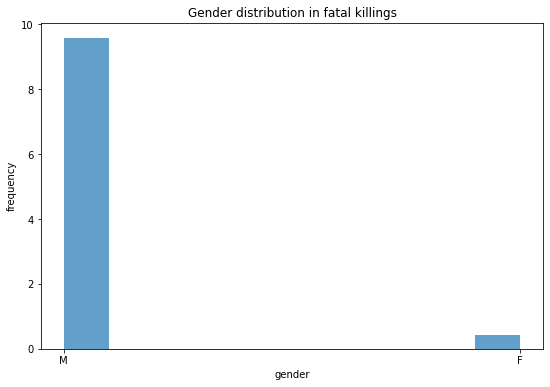

In [19]:
plt.figure(figsize=(9,6))
plt.hist(onesheetkill['gender'],density = 3,  
                            alpha = 0.7)
plt.title("Gender distribution in fatal killings")
plt.xlabel('gender') 
plt.ylabel('frequency') 
plt.show()

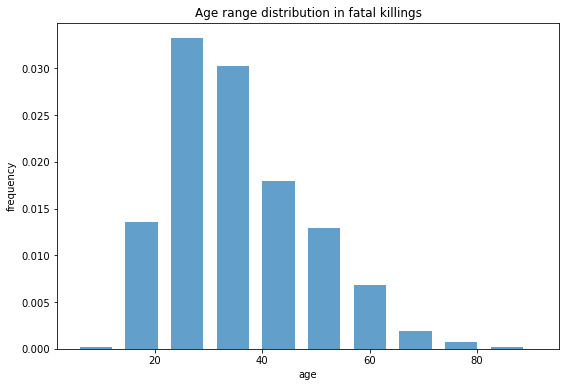

In [20]:
plt.figure(figsize=(9,6))
plt.hist(onesheetkill['age'],density = 0.8,  
                            alpha = 0.7,width = 6)
plt.title("Age range distribution in fatal killings")
plt.xlabel('age') 
plt.ylabel('frequency') 
plt.show()

2. is there any correlation between the number of fatal shooting cases or the poverty rate and education level in one city?

In [21]:
# pip install plotly_express

In [22]:
import plotly_express as px
import seaborn as sns

In [23]:
# find the number of police-killing issues in different states
onesheetkill['count'] = onesheetkill.groupby('state')['state'].transform('size')

In [24]:
# show the relationship between the poverty rate and number of police-killing issues
px.scatter(onesheetkill, x='count', y='poverty_rate',hover_name='state')

In [25]:
# show the relationship between the education level and number of police-killing issues
px.scatter(onesheetkill, x='count', y='percent_completed_hs',hover_name='state')

In [26]:
# create a dataframe only contain number of issues, poverty rate and education level
killCorrelation = onesheetkill[['count','percent_completed_hs','poverty_rate']]

Text(0.5, 1.0, 'Relationship between the three variables')

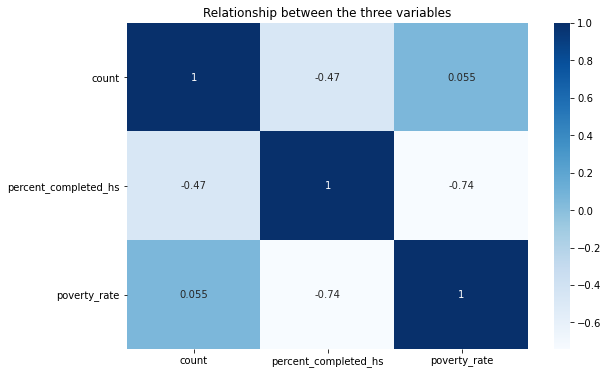

In [27]:
# use the heatmap to show the relationship between the three variables
plt.figure(figsize=(9,6))
killCorrelation.corr()
sns.heatmap(killCorrelation.corr(), annot=True, cmap='Blues') 
plt.title('Relationship between the three variables')


3. What is this killing tendency pattern of fatal shooting in the US by a police officer in the line of duty over time? Did such tragedies issues happen frequently?


In [28]:
# copy the raw dataframe
onesheetkillCopy = onesheetkill

In [29]:
# change the column 'date' into date
onesheetkillCopy['date'] = pd.to_datetime(onesheetkillCopy['date'])

In [30]:
# set 'date' as index
onesheetkillCopy = onesheetkillCopy.set_index('date')

In [31]:
# create dataframes of different years
onesheetkill_15 = onesheetkillCopy['2015']
onesheetkill_16 = onesheetkillCopy['2016']
onesheetkill_17 = onesheetkillCopy['2017']

<ipython-input-31-93071171f8f9>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-31-93071171f8f9>:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-31-93071171f8f9>:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [32]:
# create a series that contain the number of issues that happen in different years
yearData = pd.Series([len(onesheetkill_15),len(onesheetkill_16),len(onesheetkill_17)], index=['2015','2016','2017'])

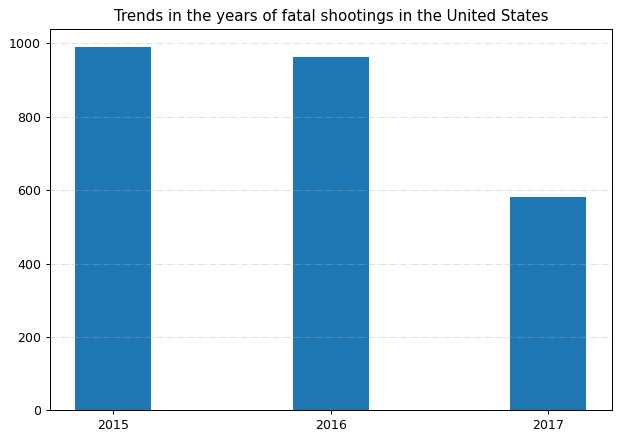

In [33]:
# use a chart to show the number of police-killing issues in different years
fig = plt.figure(figsize=(7, 5),  dpi=90) 
ax = fig.add_subplot(1,1,1) 
x, y = yearData.index, yearData.values
rects = plt.bar(x, y, width=0.35, label='label1')
plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.title('Trends in the years of fatal shootings in the United States')
# plt.legend()
plt.tight_layout()

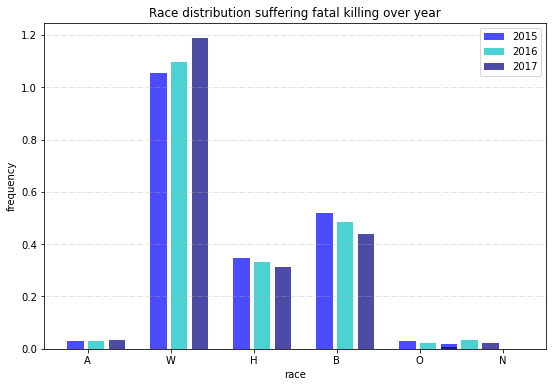

In [34]:
# compare different variables in different years
bar_width=0.2
plt.figure(figsize=(9,6))
plt.hist(onesheetkill_15['race'],density = 1,  
                            alpha = 0.7,color = 'blue',align = 'left',width = bar_width,label = '2015')
plt.hist(onesheetkill_16['race'],density = 1,  
                            alpha = 0.7,color = 'c',width = bar_width,label = '2016')

plt.hist(onesheetkill_17['race'],density = 1,  
                            alpha = 0.7,color = 'navy',align = 'right',width = bar_width,label = '2017')

plt.title("Race distribution suffering fatal killing over year")
plt.xlabel('race') 
plt.ylabel('frequency') 
plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.legend()
plt.show()

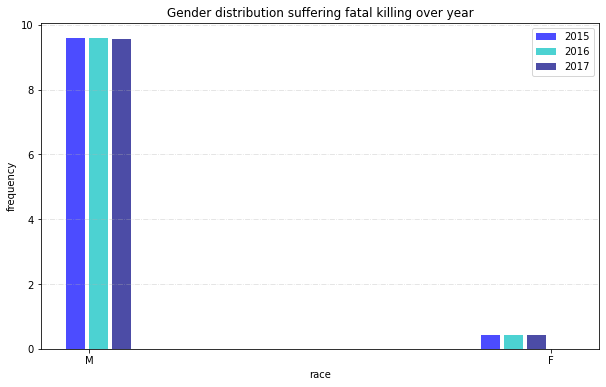

In [35]:
# compare different variables in different years
bar_width=0.04
plt.figure(figsize=(10,6))
plt.hist(onesheetkill_15['gender'],density = 1,  
                            alpha = 0.7,color = 'blue',align = 'left',width = bar_width,label = '2015')
plt.hist(onesheetkill_16['gender'],density = 1,  
                            alpha = 0.7,color = 'c',width = bar_width,label = '2016')

plt.hist(onesheetkill_17['gender'],density = 1,  
                            alpha = 0.7,color = 'navy',align = 'right',width = bar_width,label = '2017')

plt.title("Gender distribution suffering fatal killing over year")
plt.xlabel('race') 
plt.ylabel('frequency') 
plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.legend()
plt.show()

4. Is there some hidden correlation between manner of death with the situation of armed?



In [36]:
finalkillingdata = pd.read_csv('../data/finalkillingdata.csv')

armed_condition = onesheetkill[['manner_of_death','armed']]
armed_condition1 = armed_condition.groupby('armed')['manner_of_death'].value_counts().unstack()
armed_condition1 = armed_condition1.fillna(0)
armed_condition2 = armed_condition.groupby('manner_of_death')['armed'].value_counts().unstack()
armed_condition2 = armed_condition2.fillna(0)
armed_condition1

index = armed_condition1.index 
index_list = index.tolist() 
index_list[16] = 'contractor level'
armed_condition1.index = index_list
print(armed_condition1)

armed_condition1 = armed_condition1.rename(columns = {'shot':'shot','shot and Tasered':'shotandTasered','armed':'armed'})

armed_condition1['armed'] = index_list

unarmed = ['unarmed']
undetermined = ['undetermined','unknown weapon']
vehicle = ['vehicle','motorcycle']
sports_equipment=['baseball bat', 'baseball bat and bottle','baseball bat and fireplace poker']
unthreaten=['air conditioner','beer bottle','flashlight','garden tool','hand torch','pen','rock',
           'screwdriver','stapler','straight edge razor']
lessthreaten=['ax','baton','bayonet','blunt object','box cutter','brick','carjack','chain','contractor level',
             'cordless drill','crossbow','crowbar','fireworks','flagpole','glass shard','hammer','hatchet','knife',
             'lawn mower blade','machete','meat cleaver','metal hand tool','metal pipe','metal pole','metal rake',
            'metal stick','oar','pick-axe','piece of wood','pipe','pitchfork','pole','pole and knife','scissors',
             'sword','tire iron','nail gun']
threaten=['bean-bag gun','chain saw','sharp object',
              'shovel','spear']
morethreaten=['hatchet and gun','machete and gun','gun','gun and knife','guns and explosives']

unarmed_S = []
undetermined_S =[]
vehicle_S = []
sports_equipment_S = []
unthreaten_S = []
lessthreaten_S = []
threaten_S = []
morethreaten_S = []
unarmed_T = []
undetermined_T =[]
vehicle_T = []
sports_equipment_T = []
unthreaten_T = []
lessthreaten_T = []
threaten_T = []
morethreaten_T = []
shot_v = []
shotT = []

def shot_value(a,b):
    for i in a:
        b.append(armed_condition1.loc[i].shot)
    shot_v.append(sum(b))

def shot_and_asered_value(a,b):
    for i in a:
        b.append(armed_condition1.loc[i].shotandTasered)
    shotT.append(sum(b))


manner_of_death           shot  shot and Tasered
Taser                      5.0               4.0
air conditioner            1.0               0.0
ax                         8.0               1.0
baseball bat               7.0               1.0
baseball bat and bottle    1.0               0.0
...                        ...               ...
toy weapon               102.0               2.0
unarmed                  143.0              28.0
undetermined             112.0               5.0
unknown weapon            17.0               1.0
vehicle                  171.0               6.0

[68 rows x 2 columns]


In [37]:
shot_value(unarmed,unarmed_S)
shot_and_asered_value(unarmed,unarmed_T)

shot_value(undetermined,undetermined_S)
shot_and_asered_value(undetermined,undetermined_T)

shot_value(vehicle,vehicle_S)
shot_and_asered_value(vehicle,vehicle_T)

shot_value(sports_equipment,sports_equipment_S)
shot_and_asered_value(sports_equipment,sports_equipment_T)

shot_value(unthreaten,unthreaten_S)
shot_and_asered_value(unthreaten,unthreaten_T)

shot_value(lessthreaten,lessthreaten_S)
shot_and_asered_value(lessthreaten,lessthreaten_T)

shot_value(threaten,threaten_S)
shot_and_asered_value(threaten,threaten_T)

shot_value(morethreaten,morethreaten_S)
shot_and_asered_value(morethreaten,morethreaten_T)

armed_and_manner_of_death = pd.DataFrame({"shot":shot_v,"shot_and_Tasered":shotT}, 
                                         index = ['unarmed','undetermined','vehicle','sports_equipment',
                                        "unthreaten","lessthreaten", "threaten","morethreaten"])

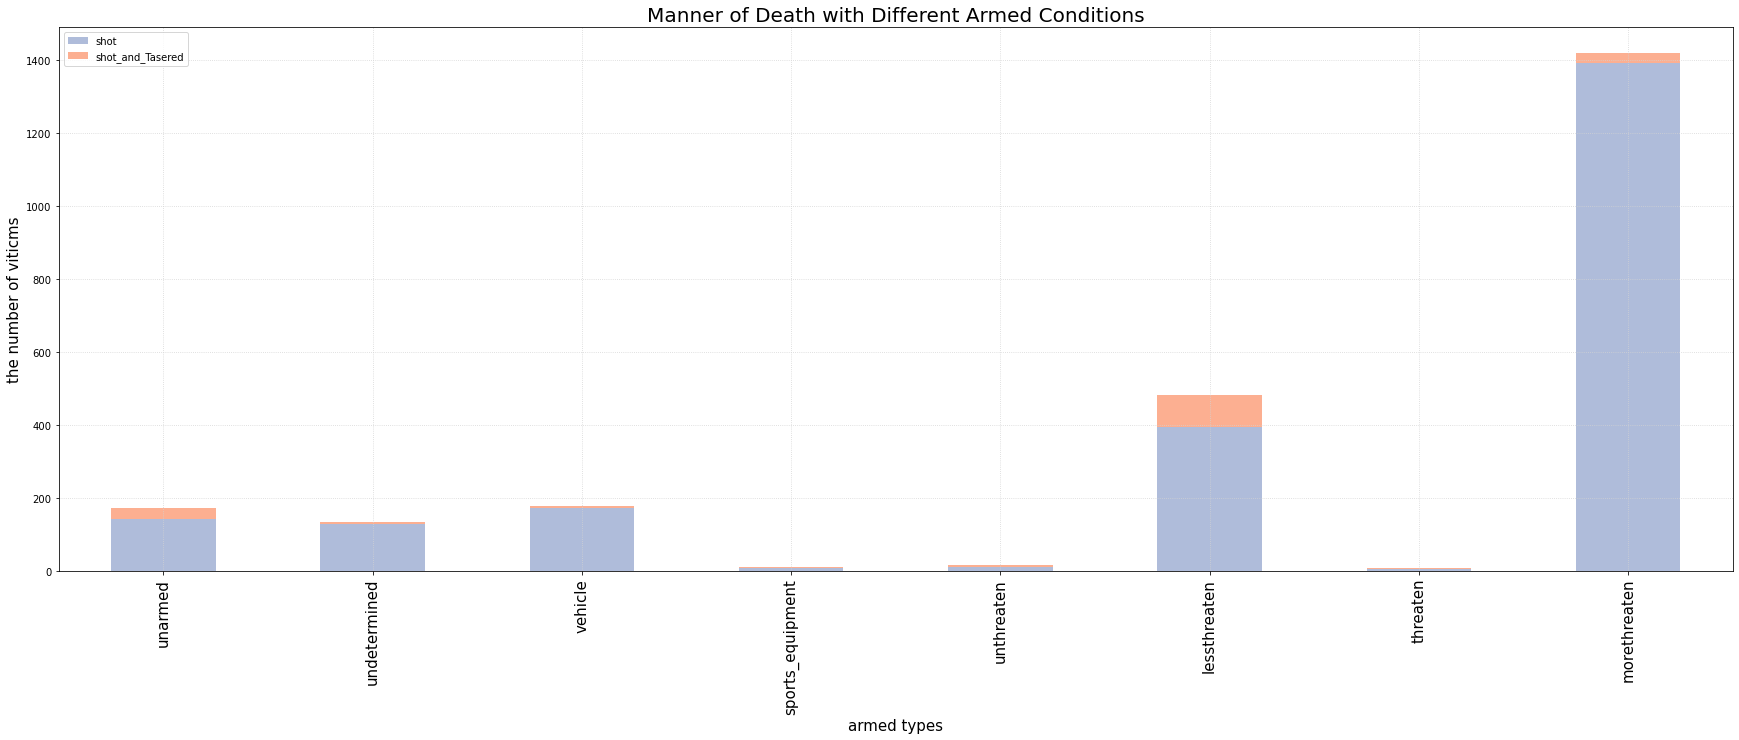

In [38]:
colors = ["#8da0cb", "#fc8d62"]
armed_and_manner_of_death.plot(kind='bar', 
                   stacked=True,
                   figsize=(30,10),
                   alpha = 0.7,
                   color=colors).grid(b=1,linestyle=':',c="lightgrey")
plt.xticks(fontsize=15)
plt.xlabel('armed types', fontsize=15)
plt.ylabel('the number of viticms', fontsize=15)
plt.title('Manner of Death with Different Armed Conditions', fontsize=20)
plt.legend(loc="upper left")
#plt.show()
#plt.sivefig('1.jpg',dpi=300)

5. Are there any characteristics of the distribution of shootings in various states in the United States?  Which state has the most shootings in the US (most dangerous state)

In [39]:
import plotly.graph_objects as go 

# use the map to show the distribution
fig = go.Figure(data=go.Choropleth( 
    locations=onesheetkill['state'], # set location 
    z = onesheetkill['count'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = "number of police-killing issues"))  

fig.update_layout( 
    title_text = 'Police-killing issues different staes of USA', 
    geo_scope='usa',) 


6. Is that true that glee behavior are more likely to trigger polices using terser?


<Figure size 9000x3000 with 0 Axes>

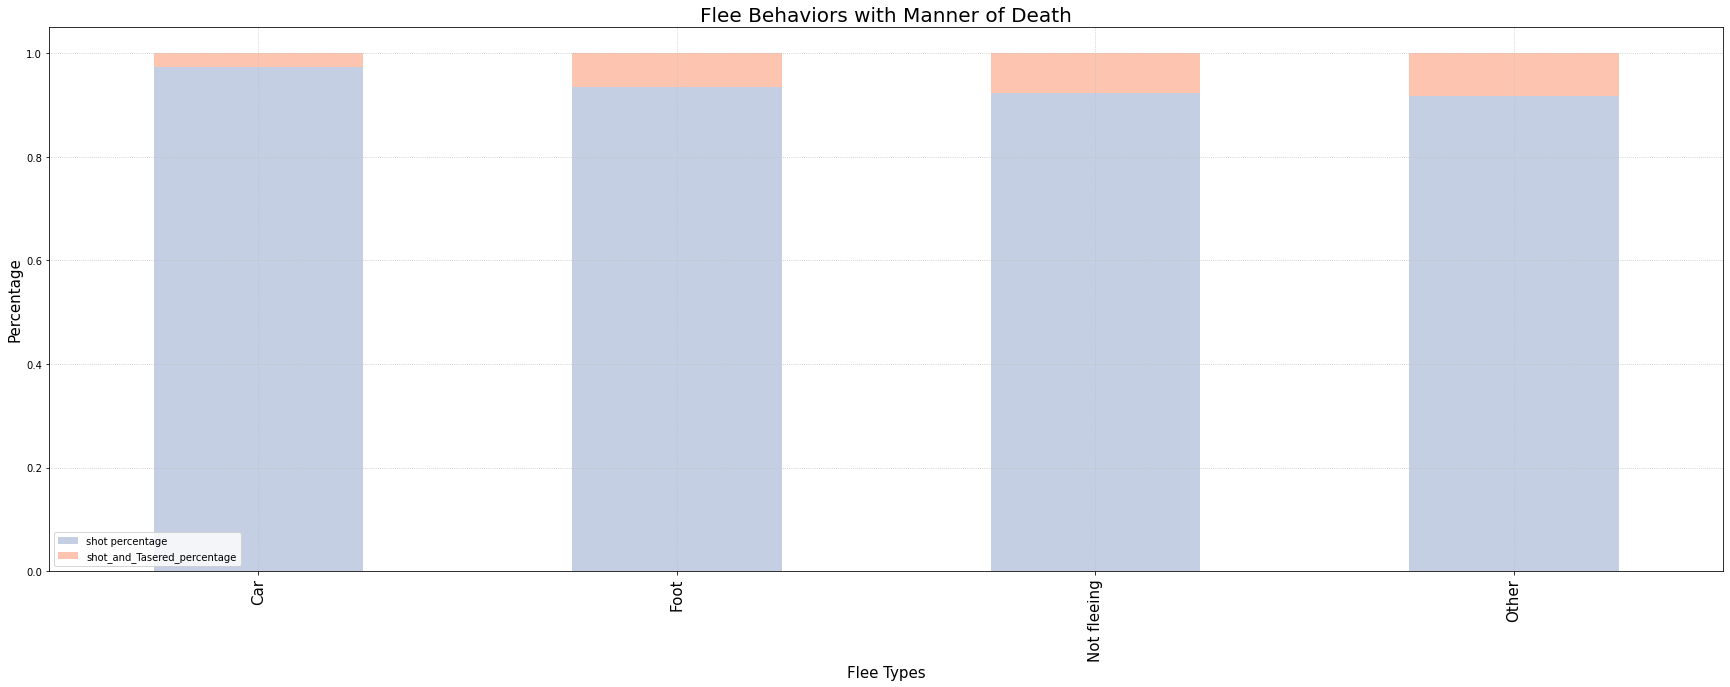

In [40]:
flee_behavior = finalkillingdata[['manner_of_death','flee']].groupby('flee')['manner_of_death'].value_counts().unstack()

flee_behavior['total']=flee_behavior[["shot","shot and Tasered"]].apply(lambda x:x["shot"]+x["shot and Tasered"],axis=1)
flee_behavior['shot percentage']=flee_behavior[["shot","total"]].apply(lambda x:x["shot"]/x["total"],axis=1)
flee_behavior['shot_and_Tasered_percentage']=flee_behavior[["shot and Tasered","total"]].apply(lambda x:x["shot and Tasered"]/x["total"],axis=1)

flee_behavior=flee_behavior.drop(columns='total')
flee_behavior=flee_behavior.drop(columns='shot')
flee_behavior=flee_behavior.drop(columns='shot and Tasered')

fig1 = plt.figure(figsize=(30, 10),  dpi=300)  
colors = ["#8da0cb", "#fc8d62"]
flee_behavior.plot(kind='bar', 
                   stacked=True,
                   alpha = 0.5,
                   figsize=(30,10),
                   color=colors).grid(b=1,linestyle=':',c="lightgrey")
plt.xticks(fontsize=15)
plt.xlabel('Flee Types', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Flee Behaviors with Manner of Death', fontsize=20)
plt.grid(b=1,linestyle=":",c="silver")
plt.legend(loc="lower left")
plt.show()
#fig.savefig('Flee Behaviors with Manner of Death.jpg', dpi=300)


7. Is there a declare trend of the number of police shooting cases after widely social discussion and reporting?


In [41]:
trend = onesheetkill[['manner_of_death','date']]#.groupby('manner_of_death')['manner_of_death'].value_counts().unstack()

trend.columns = ['manner','date']
trend['date'] = pd.to_datetime(trend['date']) 
trend = trend.set_index('date')
trend.loc[trend['manner'].str.contains('shot and Tasered'), 'manner'] = 'shotandTasered'

month=['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
       '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
      '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06',
       '2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
      '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06',
       '2017-07','2017-08','2017-09','2017-10','2017-11','2017-12']
a = []
b = []
for i in month:
    a.append(trend.loc[i].value_counts().shot)

for i in month:
    try:
        trend.loc[i].value_counts().shotandTasered
        b.append(trend.loc[i].value_counts().shotandTasered)
    except:
        b.append(0)
        
for i in a:
    float(i)
for i in b:
    float(i)
    
timeline = pd.DataFrame({"shot":a,"shotandTasered":b,"date":month})
timeline['date'] = pd.to_datetime(timeline['date'])
timeline.set_index('date')
timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   shot            36 non-null     int64         
 1   shotandTasered  36 non-null     int64         
 2   date            36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


<ipython-input-41-43ef8451ce2a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



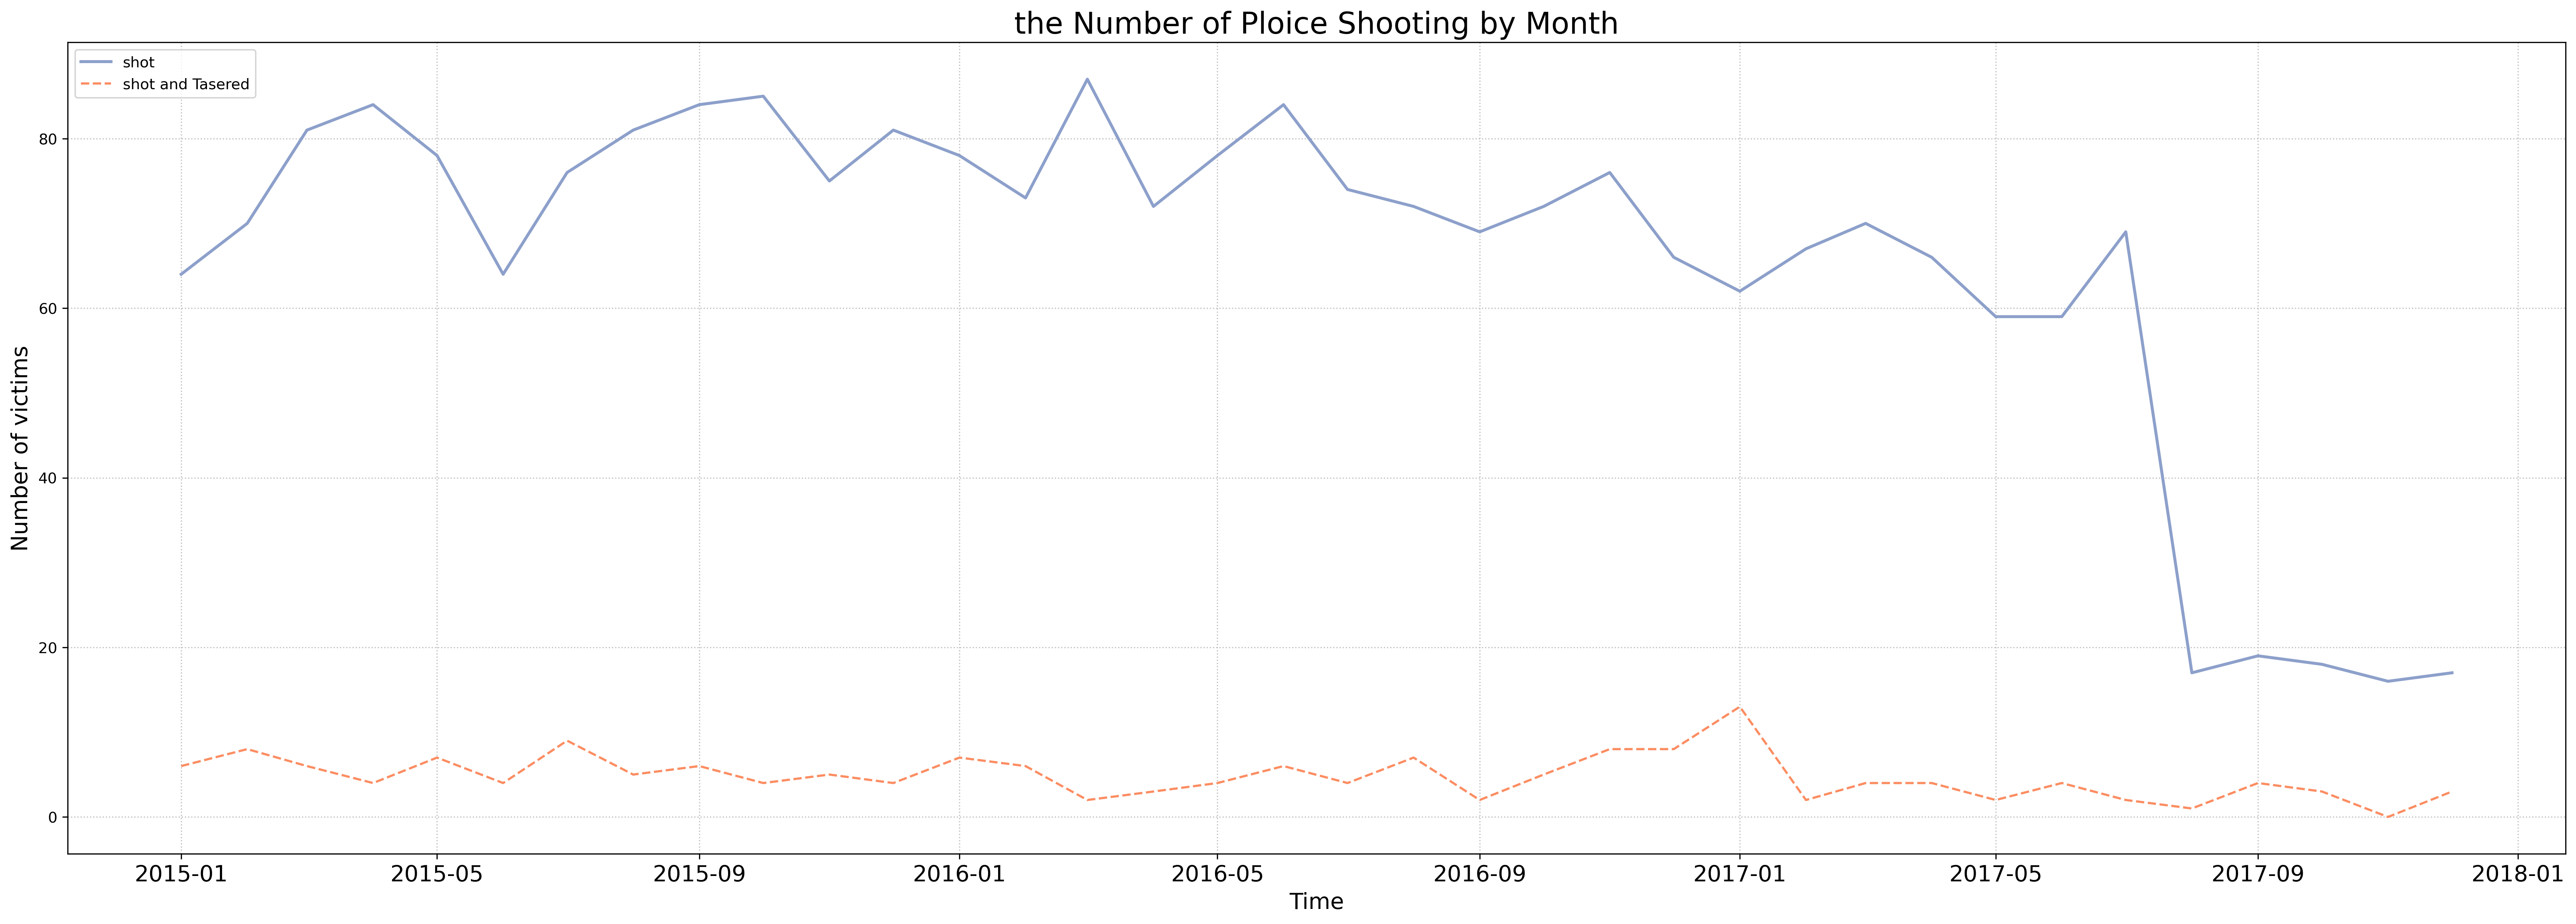

In [42]:
fig = plt.figure(figsize=(30, 10),  dpi=300)  
plt.plot(timeline.date, 
         timeline.shot, 
         linestyle = '-', 
         linewidth = 2, 
         color = '#8da0cb',
         label = 'shot'
         )
plt.plot(timeline.date,
         timeline.shotandTasered,
         linestyle = '--', 
         color = '#fc8d62',
         label = 'shot and Tasered'
        )
plt.grid(b=1, linestyle=":",c="silver")
plt.xticks(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of victims', fontsize=15)
plt.title('the Number of Ploice Shooting by Month', fontsize=20)
plt.legend(loc="upper left")
plt.show()
fig.savefig('police shooting.jpg', dpi=300)

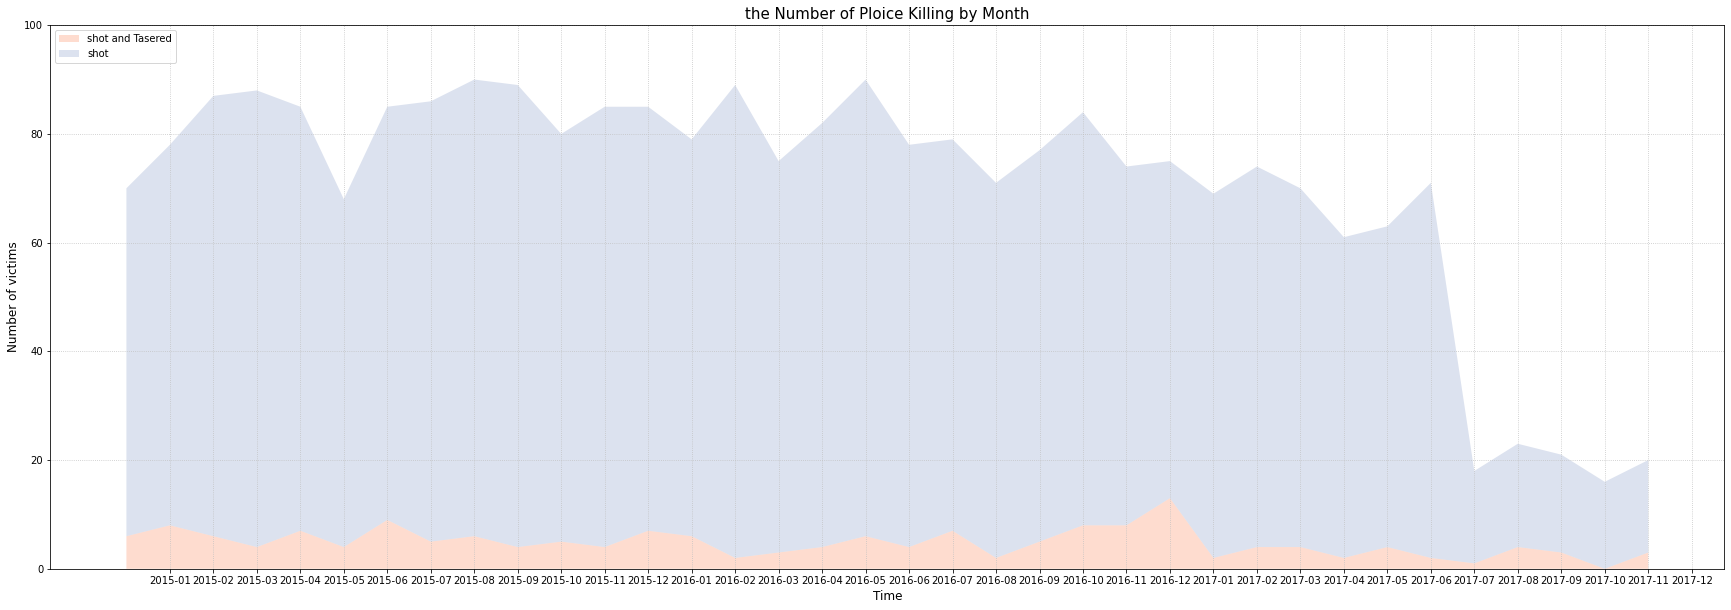

In [43]:
x = month
y1 = b
y2 = a
fig, ax = plt.subplots(facecolor='white',figsize=(30,10))
labels = ["shot and Tasered", "shot"]
colors = ["#fc8d62", "#8da0cb"]
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36),
           ('2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
       '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
      '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06',
       '2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
      '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06',
       '2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'),fontsize=5)#, rotation=90
plt.stackplot(x, y1, y2,labels=labels, colors=colors, alpha=0.3)
plt.xticks(fontsize=10 )
plt.ylim((0, 100))
plt.legend(loc="upper left")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of victims", fontsize=12)
plt.title('the Number of Ploice Killing by Month', fontsize=15)
plt.grid(b=1, linestyle=':',c="silver")
plt.show()
fig.savefig('police killing.jpg', dpi=300)

8. What are the characteristics of the states and territories with high shooting rates in terms of income, education level, racial distribution, poverty level, etc.?

As we know, "CA","TX","FL" are top 3 that fatal killings

And then, we need to check others 4 file about income, education level, racial distribution, poverty level.

In [44]:
onesheetkill[onesheetkill['state'].isin(["CA","TX","FL"])]

Unnamed: 0    id                        name       date  \
3              3     8             Matthew Hoffman 2015-04-01   
10            10    19              Patrick Wetter 2015-06-01   
11            11    21                   Ron Sneed 2015-07-01   
20            20   325               Andy Martinez 2015-09-01   
22            22    43              Brian  Barbosa 2015-11-01   
...          ...   ...                         ...        ...   
2521        2521  2806                       TK TK 2017-07-26   
2522        2522  2807                  Susan Teel 2017-07-26   
2524        2524  2816  Jerauld Phillip Hammond II 2017-07-27   
2526        2526  2809     Sergio Velasco-Martinez 2017-07-27   
2528        2528  2812          Alejandro Alvarado 2017-07-27   

       manner_of_death         armed       age gender race           city  \
3                 shot    toy weapon  32.00000      M    W  San Francisco   
10    shot and Tasered         knife  25.00000      M    W       Stockton   
11                shot           gun  31.00000      M    B       Freeport   
20                shot           gun  33.00000      M    H        El Paso   
22                shot           gun  23.00000      M    H     South Gate   
...                ...           ...       ...    ...  ...            ...   
2521              shot           gun  36.60537      M    W    San Antonio   
2522              shot         knife  62.00000      F    W     Vero Beach   
2524              shot           gun  46.00000      M    W    Los Angeles   
2526              shot  blunt object  25.00000      M    W         Avenal   
2528              shot         knife  36.60537      M    H     Chowchilla   

      ... body_camera  poverty_rate percent_completed_hs Median Income  \
3     ...       False     16.888371            80.824639  55712.436268   
10    ...       False     16.888371            80.824639  55712.436268   
11    ...       False     19.496222            74.086949  45596.873497   
20    ...       False     19.496222            74.086949  45596.873497   
22    ...       False     16.888371            80.824639  55712.436268   
...   ...         ...           ...                  ...           ...   
2521  ...       False     19.496222            74.086949  45596.873497   
2522  ...       False     17.508606            85.457625  48565.366013   
2524  ...       False     16.888371            80.824639  55712.436268   
2526  ...       False     16.888371            80.824639  55712.436268   
2528  ...       False     16.888371            80.824639  55712.436268   

      share_asian  share_black  share_hispanic  share_native_american  \
3        5.542613     2.679645       29.513592               1.715167   
10       5.542613     2.679645       29.513592               1.715167   
11       1.012443     5.866324       39.275000               0.657363   
20       1.012443     5.866324       39.275000               0.657363   
22       5.542613     2.679645       29.513592               1.715167   
...           ...          ...             ...                    ...   
2521     1.012443     5.866324       39.275000               0.657363   
2522     1.616739    13.370870       16.529130               0.455435   
2524     5.542613     2.679645       29.513592               1.715167   
2526     5.542613     2.679645       29.513592               1.715167   
2528     5.542613     2.679645       29.513592               1.715167   

      share_white  count  
3       71.535982    424  
10      71.535982    424  
11      82.403368    225  
20      82.403368    225  
22      71.535982    424  
...           ...    ...  
2521    82.403368    225  
2522    78.672500    154  
2524    71.535982    424  
2526    71.535982    424  
2528    71.535982    424  

[803 rows x 24 columns]

#### 1.poverty rate distribution in high fatal killing sate

In [45]:
povertyData_highkill = povertyData[povertyData['Geographic Area'].isin(["CA","TX","FL"])]
povertyData_highkill.describe()

poverty_rate
count   4187.000000
mean      18.112467
std       15.251579
min        0.000000
25%        7.600000
50%       15.100000
75%       24.700000
max      100.000000

In [46]:
povertyData_highkill

Geographic Area                City  poverty_rate
1932               CA  Acalanes Ridge CDP           2.5
1933               CA          Acampo CDP           0.0
1934               CA           Acton CDP           7.6
1935               CA       Adelanto city          40.3
1936               CA            Adin CDP          12.6
...               ...                 ...           ...
26272              TX          Zapata CDP          17.8
26273              TX    Zapata Ranch CDP           3.0
26274              TX          Zarate CDP           0.0
26275              TX        Zavalla city          35.2
26276              TX           Zuehl CDP           3.6

[4187 rows x 3 columns]

In [47]:
CA_pov = povertyData_highkill[povertyData_highkill['Geographic Area'].isin(['CA'])]['poverty_rate']

In [48]:
a= povertyData_highkill['Geographic Area']
b = povertyData_highkill['poverty_rate']

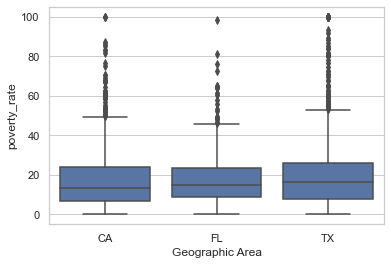

In [49]:
a= povertyData_highkill['Geographic Area']
b = povertyData_highkill['poverty_rate']

import seaborn as sns
sns.set_theme(style="whitegrid")
ax1 = sns.boxplot(x=a, y=b, data=povertyData_highkill,color= 'b')

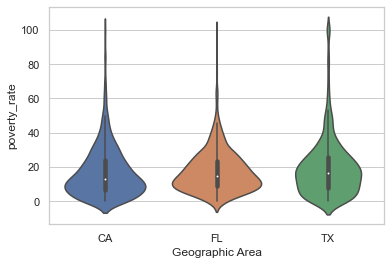

In [50]:
ax2= sns.violinplot(x=a, y=b, data=povertyData_highkill)

In [51]:
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='Geographic Area', ylabel='poverty_rate'>

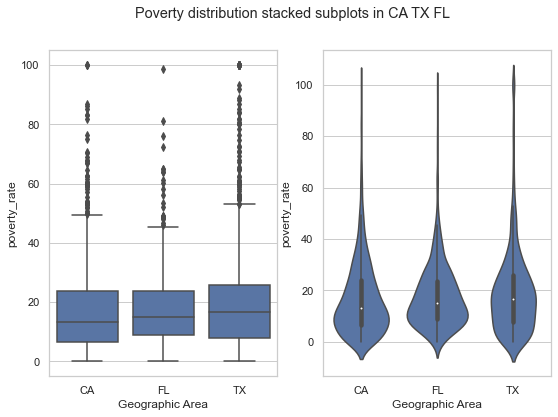

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(9,6))
fig.suptitle('Poverty distribution stacked subplots in CA TX FL')
sns.boxplot(ax=ax1, x=a, y=b, data=povertyData_highkill,color= 'b')
sns.violinplot(ax=ax2, x=a, y=b, data=povertyData_highkill,color= 'b')

#### 2.education level distribution in high fatal killing sate

In [53]:
highschData

Geographic Area                    City  percent_completed_hs
0                  AL              Abanda CDP                  21.2
1                  AL          Abbeville city                  69.1
2                  AL         Adamsville city                  78.9
3                  AL            Addison town                  81.4
4                  AL              Akron town                  68.6
...               ...                     ...                   ...
29324              WY  Woods Landing-Jelm CDP                 100.0
29325              WY            Worland city                  85.6
29326              WY             Wright town                  89.2
29327              WY              Yoder town                  79.4
29328              WY           Y-O Ranch CDP                 100.0

[29329 rows x 3 columns]

In [54]:
highsch_highkill = highschData[highschData['Geographic Area'].isin(["CA","TX","FL"])]

In [55]:
highsch_highkill.describe()

percent_completed_hs
count           4187.000000
mean              79.029162
std               19.975167
min                0.000000
25%               72.900000
50%               84.400000
75%               92.600000
max              100.000000

In [56]:
c = highsch_highkill['Geographic Area']
d = highsch_highkill['percent_completed_hs']

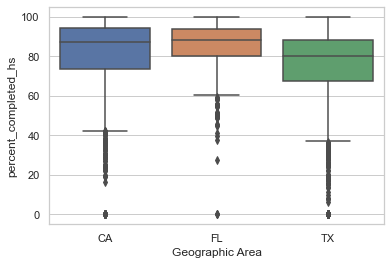

In [57]:
ax3 = sns.boxplot(x=c, y=d, data=highsch_highkill)

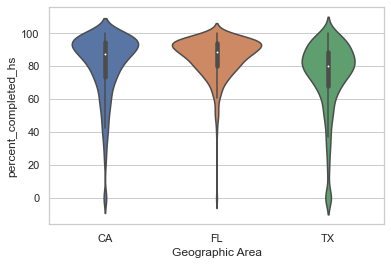

In [58]:
ax4= sns.violinplot(x=c, y=d, data=highsch_highkill)

<AxesSubplot:xlabel='Geographic Area', ylabel='percent_completed_hs'>

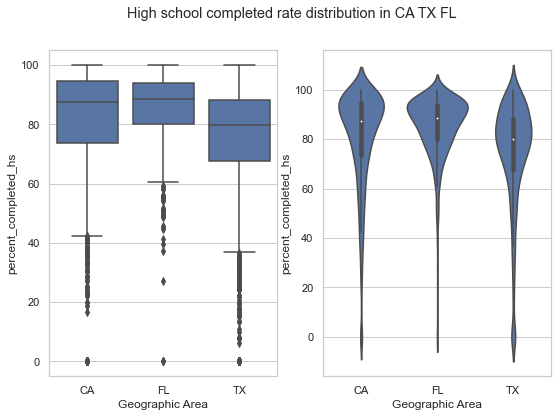

In [59]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(9,6))
fig.suptitle('High school completed rate distribution in CA TX FL')
sns.boxplot(ax=ax3, x=c, y=d, data=highsch_highkill,color= 'b')
sns.violinplot(ax=ax4, x=c, y=d, data=highsch_highkill,color= 'b')

#### 3.householdincoming distribution in high fatal killing sate

In [60]:
householdincoming

Geographic Area                    City  Median Income
0                  AL              Abanda CDP          11207
1                  AL          Abbeville city          25615
2                  AL         Adamsville city          42575
3                  AL            Addison town          37083
4                  AL              Akron town          21667
...               ...                     ...            ...
29317              WY  Woods Landing-Jelm CDP              0
29318              WY            Worland city          41523
29319              WY             Wright town          77114
29320              WY              Yoder town          37500
29321              WY           Y-O Ranch CDP              0

[29322 rows x 3 columns]

In [61]:
inco_highkill = householdincoming[householdincoming['Geographic Area'].isin(["CA","TX","FL"])]

In [62]:
inco_highkill.describe()

Median Income
count    4187.000000
mean    49924.784332
std     32976.105412
min         0.000000
25%     32349.500000
50%     44722.000000
75%     62311.500000
max    250000.000000

In [63]:
e = inco_highkill['Geographic Area']
f = inco_highkill['Median Income']

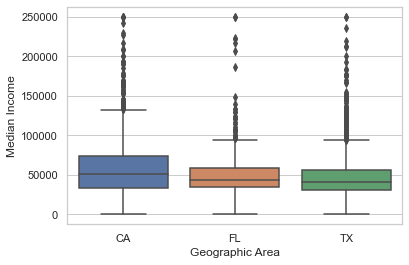

In [64]:
ax5 = sns.boxplot(x=e, y=f, data=inco_highkill)

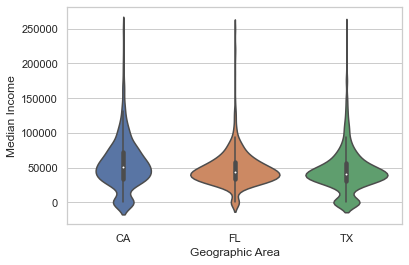

In [65]:
ax6 = sns.violinplot(x=e, y=f, data=inco_highkill)

<AxesSubplot:xlabel='Geographic Area', ylabel='Median Income'>

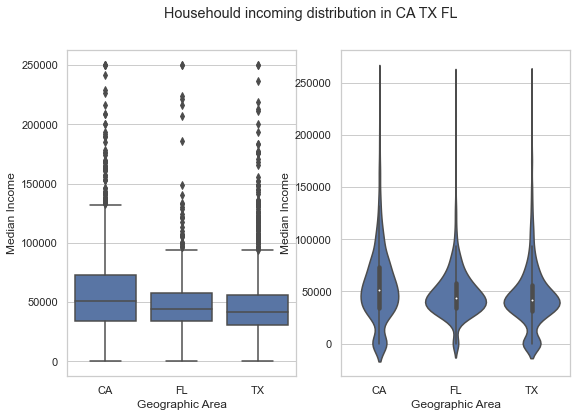

In [66]:
fig, (ax5, ax6) = plt.subplots(1, 2,figsize=(9,6))
fig.suptitle('Househould incoming distribution in CA TX FL')
sns.boxplot(ax=ax5, x=e, y=f, data=inco_highkill, color='b')
sns.violinplot(ax=ax6, x=e, y=f, data=inco_highkill, color='b')

#### 4.Race sharity distribution in high fatal killing sate

In [67]:
race_highkill = shareraceData[shareraceData['Geographic area'].isin(["CA","TX","FL"])]

In [68]:
race_highkill.describe()

share_white  share_black  share_native_american  share_asian  \
count  4195.000000  4195.000000            4195.000000  4195.000000   
mean     77.639738     6.355209               0.997116     2.789654   
std      18.505989    12.118991               2.146985     6.335011   
min       0.000000     0.000000               0.000000     0.000000   
25%      68.500000     0.500000               0.300000     0.200000   
50%      83.300000     1.500000               0.600000     0.800000   
75%      91.300000     6.500000               1.100000     2.400000   
max     100.000000    97.900000              66.700000    66.900000   

       share_hispanic  
count     4195.000000  
mean        30.742741  
std         29.950312  
min          0.000000  
25%          7.500000  
50%         18.100000  
75%         46.350000  
max        100.000000

###### CA

In [69]:
CA_race = race_highkill[race_highkill['Geographic area'].isin(["CA"])]

CA_race_t=CA_race.T
CA_race_t = CA_race_t.drop(['Geographic area','City'],axis =0)

# race_dic={}
white_lis = []
black_lis = []
ame_lis = []
asian_lis = []
his_lis = []
for index,value in CA_race_t.iterrows():
#     print(index)

    for index1,value1 in value.items():
        if index =='share_white':
            white_lis.append(value1)
            
        elif index =='share_black':
            black_lis.append(value1)
            
        elif index =='share_native_american':
            ame_lis.append(value1)
            
        elif index =='share_asian':
            asian_lis.append(value1)
            
        elif index =='share_hispanic':
            his_lis.append(value1)
  

In [70]:
#white
df_white = pd.Series()
df = pd.Series([white_lis],index=['white'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['white'])
        df_white = df_white.append(df1)
df_white=df_white.to_frame()

#black
df_black = pd.Series()
df = pd.Series([black_lis],index=['black'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['black'])
        df_black = df_black.append(df1)
df_black=df_black.to_frame()
#native american 
df_american = pd.Series()
df = pd.Series([ame_lis],index=['native american'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['native american'])
        df_american = df_american.append(df1)
df_american =df_american.to_frame()

#asian
df_asian = pd.Series()
df = pd.Series([ame_lis],index=['asian'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['asian'])
        df_asian = df_asian.append(df1)
df_asian =df_asian.to_frame()

#hispanic
df_hispanic = pd.Series()
df = pd.Series([his_lis],index=['hispanic'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['hispanic'])
        df_hispanic = df_hispanic.append(df1)
df_hispanic =df_hispanic.to_frame()

#concate whole df
df_CA = pd.concat([df_black,df_white,df_american,df_asian,df_hispanic])

<ipython-input-70-14ff30154570>:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-70-14ff30154570>:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-70-14ff30154570>:19: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-70-14ff30154570>:28: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-70-14ff30154570>:37: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to sile

Text(0, 0.5, 'Frequency')

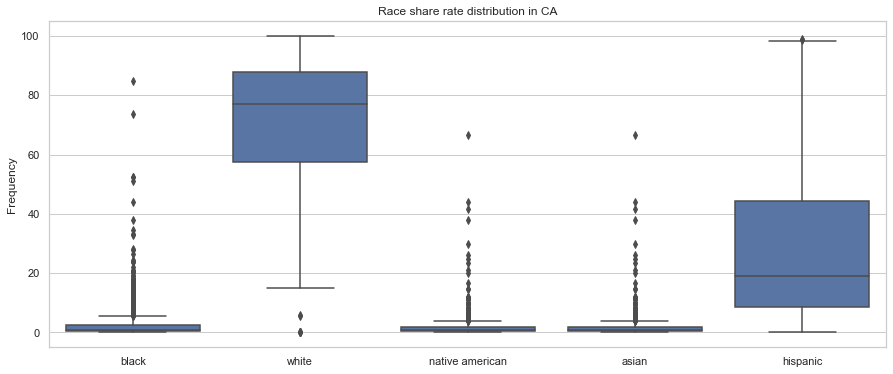

In [71]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_CA.index, y=df_CA[0], data=df_CA, color='b')
plt.title('Race share rate distribution in CA')

plt.ylabel('Frequency') 

##### TX

In [72]:
TX_race = race_highkill[race_highkill['Geographic area'].isin(["TX"])]

TX_race_t=TX_race.T
TX_race_t = TX_race_t.drop(['Geographic area','City'],axis =0)

# race_dic={}
white_lis = []
black_lis = []
ame_lis = []
asian_lis = []
his_lis = []
for index,value in TX_race_t.iterrows():
#     print(index)

    for index1,value1 in value.items():
        if index =='share_white':
            white_lis.append(value1)
            
        elif index =='share_black':
            black_lis.append(value1)
            
        elif index =='share_native_american':
            ame_lis.append(value1)
            
        elif index =='share_asian':
            asian_lis.append(value1)
            
        elif index =='share_hispanic':
            his_lis.append(value1)

####################
#white
df_white = pd.Series()
df = pd.Series([white_lis],index=['white'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['white'])
        df_white = df_white.append(df1)
df_white=df_white.to_frame()

#black
df_black = pd.Series()
df = pd.Series([black_lis],index=['black'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['black'])
        df_black = df_black.append(df1)
df_black=df_black.to_frame()
#native american 
df_american = pd.Series()
df = pd.Series([ame_lis],index=['native american'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['native american'])
        df_american = df_american.append(df1)
df_american =df_american.to_frame()

#asian
df_asian = pd.Series()
df = pd.Series([ame_lis],index=['asian'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['asian'])
        df_asian = df_asian.append(df1)
df_asian =df_asian.to_frame()

#hispanic
df_hispanic = pd.Series()
df = pd.Series([his_lis],index=['hispanic'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['hispanic'])
        df_hispanic = df_hispanic.append(df1)
df_hispanic =df_hispanic.to_frame()

#concate whole df
df_TX = pd.concat([df_black,df_white,df_american,df_asian,df_hispanic])

<ipython-input-72-397ffa5f69f5>:33: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-72-397ffa5f69f5>:42: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-72-397ffa5f69f5>:50: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-72-397ffa5f69f5>:59: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-72-397ffa5f69f5>:68: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to sil

Text(0, 0.5, 'Frequency')

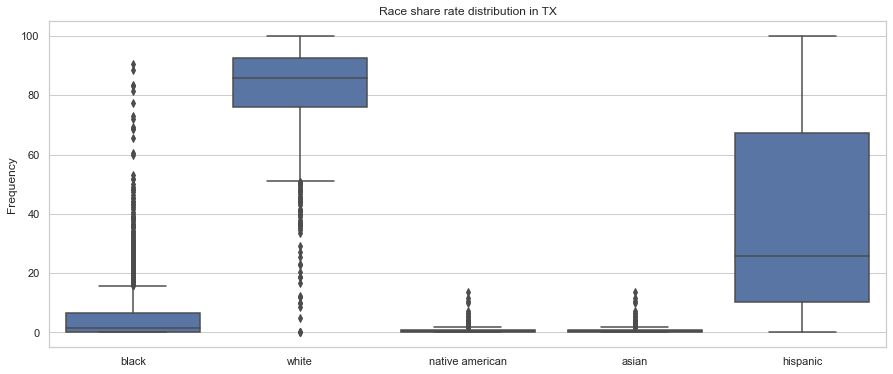

In [73]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_TX.index, y=df_TX[0], data=df_TX,color='b')
plt.title('Race share rate distribution in TX')

plt.ylabel('Frequency') 

##### FL

In [74]:
FL_race = race_highkill[race_highkill['Geographic area'].isin(["FL"])]

FL_race_t=FL_race.T
FL_race_t = FL_race_t.drop(['Geographic area','City'],axis =0)

# race_dic={}
white_lis = []
black_lis = []
ame_lis = []
asian_lis = []
his_lis = []
for index,value in FL_race_t.iterrows():
#     print(index)

    for index1,value1 in value.items():
        if index =='share_white':
            white_lis.append(value1)
            
        elif index =='share_black':
            black_lis.append(value1)
            
        elif index =='share_native_american':
            ame_lis.append(value1)
            
        elif index =='share_asian':
            asian_lis.append(value1)
            
        elif index =='share_hispanic':
            his_lis.append(value1)

####################
#white
df_white = pd.Series()
df = pd.Series([white_lis],index=['white'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['white'])
        df_white = df_white.append(df1)
df_white=df_white.to_frame()

#black
df_black = pd.Series()
df = pd.Series([black_lis],index=['black'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['black'])
        df_black = df_black.append(df1)
df_black=df_black.to_frame()
#native american 
df_american = pd.Series()
df = pd.Series([ame_lis],index=['native american'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['native american'])
        df_american = df_american.append(df1)
df_american =df_american.to_frame()

#asian
df_asian = pd.Series()
df = pd.Series([ame_lis],index=['asian'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['asian'])
        df_asian = df_asian.append(df1)
df_asian =df_asian.to_frame()

#hispanic
df_hispanic = pd.Series()
df = pd.Series([his_lis],index=['hispanic'])
for index,value in df.items():
    for value1 in value:
        df1 = pd.Series([value1],index=['hispanic'])
        df_hispanic = df_hispanic.append(df1)
df_hispanic =df_hispanic.to_frame()

#concate whole df
df_FL = pd.concat([df_black,df_white,df_american,df_asian,df_hispanic])

<ipython-input-74-9270f216ab19>:33: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-74-9270f216ab19>:42: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-74-9270f216ab19>:50: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-74-9270f216ab19>:59: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-74-9270f216ab19>:68: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to sil

Text(0, 0.5, 'Frequency')

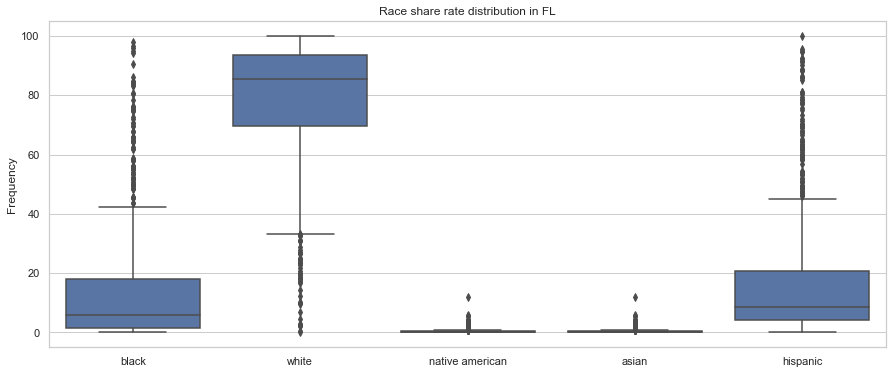

In [75]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_FL.index, y=df_FL[0], data=df_FL,color='b')
plt.title('Race share rate distribution in FL')

plt.ylabel('Frequency') 

# Machine learning analysis

#### Research questions:

RQ9.Based on this dataset,can we predict whether a victim has signs of mental illness?

RQ10.can we predict the likely race of the victim based on the remaining variables?

### Predict whether a victim has signs of mental illness

In [76]:
onesheetkill.columns

Index(['Unnamed: 0', 'id', 'name', 'date', 'manner_of_death', 'armed', 'age',
       'gender', 'race', 'city', 'state', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera', 'poverty_rate',
       'percent_completed_hs', 'Median Income', 'share_asian', 'share_black',
       'share_hispanic', 'share_native_american', 'share_white', 'count'],
      dtype='object')

In [77]:
mental_analy = onesheetkill[['manner_of_death','gender','threat_level', 'race','signs_of_mental_illness','flee','body_camera']]

In [78]:
mental_analy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   manner_of_death          2535 non-null   object
 1   gender                   2535 non-null   object
 2   threat_level             2535 non-null   object
 3   race                     2535 non-null   object
 4   signs_of_mental_illness  2535 non-null   bool  
 5   flee                     2535 non-null   object
 6   body_camera              2535 non-null   bool  
dtypes: bool(2), object(5)
memory usage: 104.1+ KB


#### 1.Feature Type Conversion

#### code schema

- race -> convert into dummies form
- gender  -> M:1; F:0
- manner_of_death -> shot and Tasered:1  shot:0
- flee -> convert into dummies form
- threat_level - > attack:1  other:0  undetermined:0

- signs_of_mental_illness -> shot:1  shot and Tasered:0

In [79]:
#race
one_hot_encoded = pd.get_dummies(mental_analy['race'],prefix='race_') #get_dummies: get vector columns
# display(one_hot_encoded)

mental_df = mental_analy.join(one_hot_encoded)
mental_df = mental_df.drop(['race'],axis = 1)
# display(mental_df)

#gender
mental_df['gender'] = mental_df['gender'].map({'M': 1, 'F': 0}) #map: input dict
# display(mental_df.head())

#flee
one_hot_encoded_flee = pd.get_dummies(mental_analy['flee']) #get_dummies: get vector columns
# display(one_hot_encoded_flee)

mental_df = mental_df.join(one_hot_encoded_flee)
mental_df = mental_df.drop(['flee'],axis = 1)
# display(mental_df)

#manner of death 
mental_df['manner_of_death'] = mental_df['manner_of_death'].map({'shot': 1, 'shot and Tasered': 0})
# display(mental_df)

#threat level 
mental_df['threat_level'] = mental_df['threat_level'].map({'attack': 1, 'other': 0,'undetermined':0})
# display(mental_df)

#body camera
mental_df['body_camera'] = mental_df['body_camera'].map(int)

#mental illness
mental_df['signs_of_mental_illness'] = mental_df['signs_of_mental_illness'].map(int)

In [80]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   manner_of_death          2535 non-null   int64
 1   gender                   2535 non-null   int64
 2   threat_level             2535 non-null   int64
 3   signs_of_mental_illness  2535 non-null   int64
 4   body_camera              2535 non-null   int64
 5   race__A                  2535 non-null   uint8
 6   race__B                  2535 non-null   uint8
 7   race__H                  2535 non-null   uint8
 8   race__N                  2535 non-null   uint8
 9   race__O                  2535 non-null   uint8
 10  race__W                  2535 non-null   uint8
 11  Car                      2535 non-null   uint8
 12  Foot                     2535 non-null   uint8
 13  Not fleeing              2535 non-null   uint8
 14  Other                    2535 non-null   uint8
dtypes: i

#### Perceptron model

In [81]:
#perceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix

# Split into feature matrix and label vector
X = mental_df.drop(['signs_of_mental_illness'], axis=1).values #input
y = mental_df['signs_of_mental_illness'].values #output

In [82]:
# Evaluation based on cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

ppn = Perceptron(max_iter=400)

cv_accuracy = cross_val_score(ppn, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())

[0.46548323 0.54635108 0.7495069  0.75147929 0.40631164]
0.5838264299802761


#### Random forest model

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier =  RandomForestClassifier()
cv_accuracy = cross_val_score(rf_classifier, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())

[0.72583826 0.74358974 0.74556213 0.74358974 0.75147929]
0.7420118343195267


#### support vector mechine

In [84]:
# cross validation using other models
from sklearn.svm import SVC

svm_classifier = SVC()#model

cv_accuracy = cross_val_score(svm_classifier, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())#higher accuracy

[0.7495069  0.7495069  0.7495069  0.75147929 0.75147929]
0.7502958579881657


#### Netural network 

In [85]:
from sklearn.neural_network import MLPClassifier
#2 hiden layyers
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 200), activation='relu', learning_rate_init = 0.01, max_iter=400)
cv_accuracy = cross_val_score(mlp_classifier, X, y, scoring='accuracy', cv = 5)
print(cv_accuracy)
print(cv_accuracy.mean())

[0.74161736 0.7495069  0.74358974 0.75147929 0.75147929]
0.747534516765286


| Algorithm       | Accuracy    |
| -----------     | ----------- |
| Perceptron      | 0.58382     |
| Random Forest   | 0.74477     |
| Netural Network | 0.73964     |
| Support Vector machine| 0.75029|


Conclusion: 

As it illustrated, SVM model owns the highest accuracy, algorithm of Random Forest comes second.
While because the features in SVM is hard to display, we choose algorithm of Random forest to calculate and display the features' importance.

test accuracy: 0.7495069033530573


<AxesSubplot:title={'center':'Importance rank of different features'}>

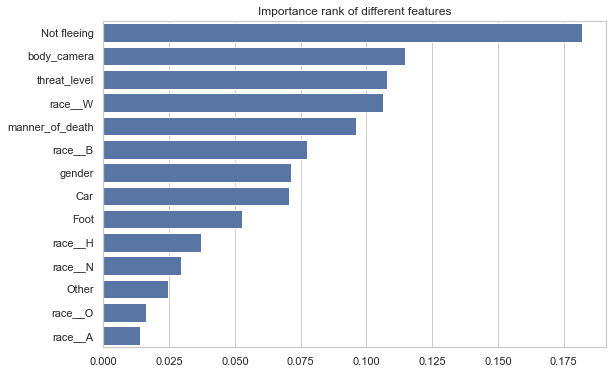

In [86]:
# Split into feature matrix and label vector
X = mental_df.drop(['signs_of_mental_illness'], axis=1).values #input
y = mental_df['signs_of_mental_illness'].values #output
# !!!Feature importance from random forest 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

rf_classifier =  RandomForestClassifier()

# Train the perceptron
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("test accuracy: " + str(sum(y_test == y_pred)/len(y_pred)))


import seaborn as sns
# feature_names = mental_df.columns[1:]

feature_names = mental_df.drop(['signs_of_mental_illness'],axis =1).columns
feature_imp = pd.Series(rf_classifier.feature_importances_, index = feature_names).sort_values(ascending=False)
plt.figure(figsize=(9,6))
plt.title('Importance rank of different features')
sns.barplot(x=feature_imp, y=feature_imp.index,color='b')
#train data change, the result will change too

### predict the likely race of the victim based on the remaining variables

In [87]:
mental_analy

manner_of_death gender threat_level race  signs_of_mental_illness  \
0                 shot      M       attack    A                     True   
1                 shot      M       attack    W                    False   
2     shot and Tasered      M        other    H                    False   
3                 shot      M       attack    W                     True   
4                 shot      M       attack    H                    False   
...                ...    ...          ...  ...                      ...   
2530              shot      M       attack    W                    False   
2531              shot      M       attack    W                    False   
2532              shot      M       attack    W                    False   
2533              shot      M       attack    B                    False   
2534              shot      M       attack    B                     True   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 7 columns]

#### Feature type conversion

- race -> predict value
- gender  -> M:1; F:0
- manner_of_death -> shot and Tasered:1  shot:0
- flee -> convert into dummies form
- threat_level - > attack:1  other:0  undetermined:0
- singn of illness -> bool to 1 0
- signs_of_mental_illness -> shot:1  shot and Tasered:0

In [88]:
race_df = pd.DataFrame()

#race
race_df['race'] =mental_analy['race']

#gender
race_df['gender'] = mental_analy['gender'].map({'M': 1, 'F': 0}) #map: input dict
# display(mental_df.head())

#flee
one_hot_encoded_flee = pd.get_dummies(mental_analy['flee']) #get_dummies: get vector columns
# display(one_hot_encoded_flee)

race_df = race_df.join(one_hot_encoded_flee)

# display(mental_df)

#manner of death 
race_df['manner_of_death'] = mental_analy['manner_of_death'].map({'shot': 1, 'shot and Tasered': 0})
# display(mental_df)

#threat level 
race_df['threat_level'] = mental_analy['threat_level'].map({'attack': 1, 'other': 0,'undetermined':0})
# display(mental_df)

#body camera
race_df['body_camera'] = mental_analy['body_camera'].map(int)

#mental illness
race_df['signs_of_mental_illness'] = mental_analy['signs_of_mental_illness'].map(int)

In [89]:
race_df

race  gender  Car  Foot  Not fleeing  Other  manner_of_death  \
0       A       1    0     0            1      0                1   
1       W       1    0     0            1      0                1   
2       H       1    0     0            1      0                0   
3       W       1    0     0            1      0                1   
4       H       1    0     0            1      0                1   
...   ...     ...  ...   ...          ...    ...              ...   
2530    W       1    0     0            1      0                1   
2531    W       1    1     0            0      0                1   
2532    W       1    1     0            0      0                1   
2533    B       1    1     0            0      0                1   
2534    B       1    0     0            1      0                1   

      threat_level  body_camera  signs_of_mental_illness  
0                1            0                        1  
1                1            0                        0  
2                0            0                        0  
3                1            0                        1  
4                1            0                        0  
...            ...          ...                      ...  
2530             1            0                        0  
2531             1            0                        0  
2532             1            0                        0  
2533             1            1                        0  
2534             1            0                        1  

[2535 rows x 10 columns]

In [90]:
# Split into feature matrix and label vector
X = race_df.drop(['race'], axis=1).values #input
y = race_df['race'].values #output

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

Maximum accuracy: 0.5505913272010512 at K = 35


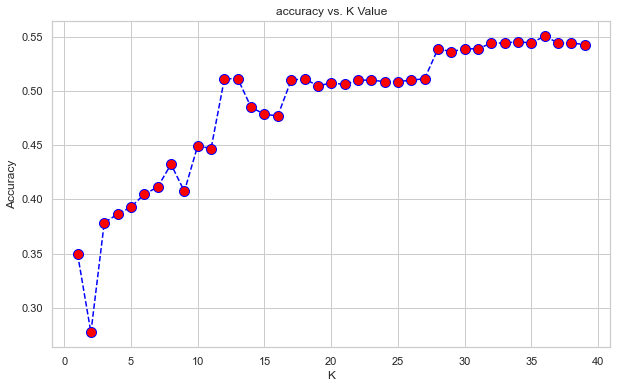

In [92]:
acc = []
# Will take some time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

Minimum error: 0.44940867279894875 at K = 35


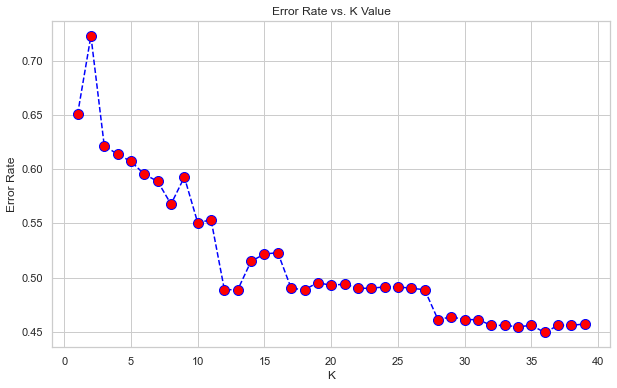

In [93]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [94]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=35)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5440210249671484


In [95]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.40473061760841
